# **Proyecto 2** | Naive Bayes

## Link del Repositorio

* https://github.com/paulabaal12/PROY2-DM

## Integrantes del equipo
- [Mónica Salvatierra - 22249](https://github.com/alee2602)
- [Paula Barillas - 22764](https://github.com/paulabaal12)
- [Derek Arreaga - 22537](https://github.com/FabianKel) 
- [Juan Pablo Solís - 22102](https://github.com/JPS4321)

### **Importar las librerías a utilizar**

In [33]:
import pickle

In [34]:
with open("data.pkl", "rb") as f:
    X_train, X_test, y_train, y_test = pickle.load(f)

print(X_train.head(), X_test.head(), y_train.head(), y_test.head())
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} filas, {X_train.shape[1]} columnas")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} filas, {X_test.shape[1]} columnas")


        Id  MSSubClass  LotFrontage  LotArea  Neighborhood  Condition1  \
87      88         160         40.0     3951      0.058904    0.863014   
1457  1458          70         66.0     9042      0.034932    0.863014   
1000  1001          20         74.0    10206      0.068493    0.863014   
1441  1442         120         69.0     4426      0.102740    0.863014   
927    928          60         69.0     9900      0.050000    0.055479   

      Condition2  OverallQual  OverallCond  YearBuilt  ...  BsmtFinType2_None  \
87      0.989726            6            5       2009  ...              False   
1457    0.989726            7            9       1941  ...              False   
1000    0.989726            3            3       1952  ...               True   
1441    0.989726            6            5       2004  ...              False   
927     0.989726            7            5       1968  ...              False   

      BsmtFinType2_Rec  BsmtFinType2_Unf  GarageType_Attchd  \
87   

In [35]:
if "PriceCategory" not in X_train.columns:
    low_threshold = y_train.quantile(0.33)
    high_threshold = y_train.quantile(0.66)

    def categorize_price(price):
        if price <= low_threshold:
            return "Económica"
        elif price <= high_threshold:
            return "Intermedia"
        else:
            return "Cara"

    y_train_class = y_train.apply(categorize_price).reset_index(drop=True)
    y_test_class = y_test.apply(categorize_price).reset_index(drop=True)
    X_train = X_train.reset_index(drop=True)
    X_test = X_test.reset_index(drop=True)

    X_train["PriceCategory"] = y_train_class
    X_test["PriceCategory"] = y_test_class

Tipo de y_train: <class 'pandas.core.series.Series'>
Nombre de y_train: SalePrice
Nombre de y_test: SalePrice
📊 Evaluación del Modelo Naïve Bayes (Regresión):
🔹 MAE (Error Absoluto Medio): 28607.51
🔹 MSE (Error Cuadrático Medio): 2874479167.39
🔹 RMSE (Raíz del Error Cuadrático Medio): 53614.17
🔹 R² (Coeficiente de determinación): 0.5965


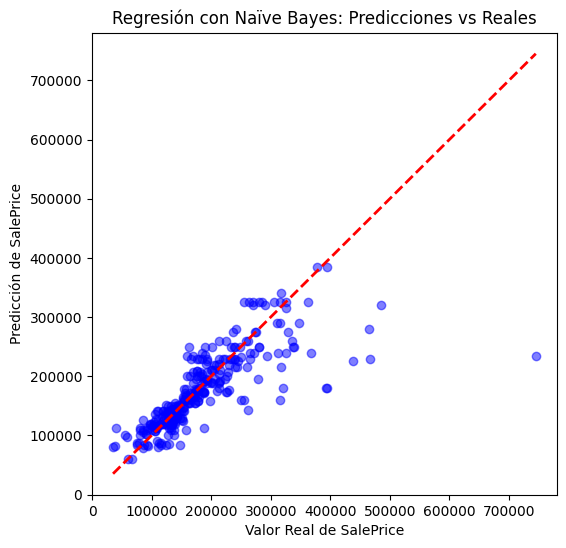

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


print(f"Tipo de y_train: {type(y_train)}")  


y_train_reg = y_train  
y_test_reg = y_test  


print(f"Nombre de y_train: {y_train.name}")  
print(f"Nombre de y_test: {y_test.name}")  


X_train_reg = X_train.drop(columns=["Id", "PriceCategory"], errors="ignore")
X_test_reg = X_test.drop(columns=["Id", "PriceCategory"], errors="ignore")


gnb = GaussianNB()
gnb.fit(X_train_reg, y_train_reg)


y_pred_reg = gnb.predict(X_test_reg)


mae = mean_absolute_error(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_reg, y_pred_reg)


print(f" Evaluación del Modelo Naïve Bayes:")
print(f" MAE (Error Absoluto Medio): {mae:.2f}")
print(f" MSE (Error Cuadrático Medio): {mse:.2f}")
print(f" RMSE (Raíz del Error Cuadrático Medio): {rmse:.2f}")
print(f" R² (Coeficiente de determinación): {r2:.4f}")


plt.figure(figsize=(6, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5, color="blue")
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], "--r", linewidth=2)
plt.xlabel("Valor Real de SalePrice")
plt.ylabel("Predicción de SalePrice")
plt.title("Regresión con Naïve Bayes: Predicciones vs Reales")
plt.show()


#### **Analice los resultados del modelo de regresión usando Bayes Ingenuo. ¿Qué tan bien hizo las predicciones? Utilice las métricas correctas.**
El modelo de regresión con Bayes Ingenuo mostró un rendimiento moderado, explicando el 59.65% de la variabilidad en los precios de las casas (R² = 0.5965). Sin embargo, el error absoluto medio (MAE = 28,607.51) y la raíz del error cuadrático medio (RMSE = 53,614.17) indican que las predicciones tienen una desviación considerable. Aunque el modelo funciona relativamente bien en valores bajos y medios, tiende a subestimar los precios más altos, lo que sugiere que la suposición de distribución normal en las variables no se cumple completamente. En general, Naïve Bayes no es la mejor opción para regresión, esto debido a sus fuertes suposiciones y la incapacidad de modelar adecuadamente la variabilidad en los datos al ser un modelo diseñado para clasificacion. 